# Synthetic Financial Dataset for Fraud Detection
> Analysis by: **Rupinder Kaur**

**Objective:** To classify transactions as "fraud" or "not fraud" based on predictors such as amount, 
oldbalanceOrg etc.

#### About the Dataset

This data is a simulation of a private dataset from financial services. It was generated using a simulator called PaySim. To Learn more about the dataset, please click on the link below:
> **Source:** __[Fraud Detection Dataset](https://www.kaggle.com/ntnu-testimon/paysim1)__

> **Variables**
> * step: Each step represents an hour of simulation. Step 1 is 1 hour
> * type: the type of transaction; there are five types: CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER
> * amount: amount of the transaction
> * nameOrig: customer who started the transaction
> * oldbalanceOrg: Balance before the transaction
> * newbalanceOrig: Balance after the transaction
> * nameDest: recipient of the transaction
> * oldbalanceDest: recipient's balance before the transaction
> * newbalanceDest: recipient's balance after the transaction
> * isFraud: whether the transaction is fraudulent or not


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## Reading the file
Fraud_detection = pd.read_csv("Fraud_detection.csv")
Fraud_detection

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Cleaning

In [3]:
## checking if "isFlaggedFraud" is something that will be useful
Fraud_detection[(Fraud_detection["isFlaggedFraud"]== 1)]
# As it can be seen below, all the entries that are 1 for "isFlaggedFraud", are already marked as fraud.
# The rest of the entries are just Zeroes-> I will drop this variable b/c it is not adding something unique to the data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [4]:
## dropping the variable "isFlaggedFraud"
Fraud_detection = Fraud_detection.drop(["isFlaggedFraud"], axis = 1)
Fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
## missing values
## In the description for the dataset it is mentioned that the providers of this data don't have information 
   ## for "oldbalanceDest" and "newbalanceDest" of recipients whose names start with M, so the 0's there, are 
   ## considered missing values 
##However we have zero as one of the class level, and as actual data for some columns, so we cannot replace them 
  ## with Nan and then use dropna()
## The approach that I will use is: run a query that will not return rows with 0's as entries for "oldbalanceDest" 
  ## and "newbalanceDest"

Fraud_detection = Fraud_detection.query('oldbalanceDest != 0 | newbalanceDest !=0')

In [6]:
## now I will run a similar query for "oldbalanceOrg" and "newbalanceOrig" 
## Because it would not make sense for the customer to begin a transaction where balance before and after the 
   ## transaction is just 0
Fraud_detection = Fraud_detection.query('oldbalanceOrg != 0 | newbalanceOrig !=0')
Fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.00,C1100439041,22425.0,0.00,0


#### If we look at the output above, we can notice a few problems:
> For instance, **Rows 10, 15 and 19**, the transaction amount is higher than the account balance and these transactions are either cash outs or transfers. It is not possible to withdraw or tranfer an amount that is higher than the balance in the account. So, I would be removing rows with such discrepancies in the next step.

In [7]:
## removing discrepancies
Fraud_detection = Fraud_detection.query('~(amount > oldbalanceOrg and (type == "CASH_OUT" | type == "TRANSFER" | type == "DEBIT"))')

In [8]:
Fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.0,16896.70,0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.0,0.00,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.0,16997.22,0


## Class Imbalance: Taking a Sample

In [9]:
(Fraud_detection["isFraud"] == 1).sum() # there are only 4098 rows for fraudulent activity

4098

In [10]:
## Before taking a sample I want to separate the transactions that are Fraud, because there are only about 4000 
   ##of them and I would like to use all of them
one = Fraud_detection[Fraud_detection["isFraud"] == 1]

In [11]:
## Transactions that are not Fraudulent
Zero = Fraud_detection[Fraud_detection["isFraud"] == 0]

In [12]:
## take a sample of 10000 rows from the non Fraudulent transactions
sample = Zero.sample(n=10000)

In [13]:
## concatenating sampled non-Fraudulent transactions and Fraudulent transactions
frames = [one, sample]
concat = pd.concat(frames)
Fraud_data_sample = concat.sample(frac = 1)# shuffling
Fraud_data_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
4736703,332,CASH_IN,10667.66,C1658109804,21997.00,32664.66,C2123179537,148860.01,138192.35,0
327762,16,CASH_OUT,828720.89,C1002446735,828720.89,0.00,C185805228,9142622.59,10184336.54,1
5940748,404,CASH_OUT,43408.38,C289135700,89443.34,46034.96,C70742682,305053.75,348462.14,0
2188588,185,CASH_IN,136706.27,C2143560628,9991.00,146697.27,C659007984,1690477.28,1553771.02,0
3248793,251,CASH_IN,149730.18,C15272705,6996178.54,7145908.72,C49826420,945681.89,795951.71,0


## Exploratory Data Analysis

In [14]:
## Summary Statistics
Fraud_data_sample.describe().apply(lambda s: s.apply('{0:.2f}'.format))
# there are extreme values in the data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,14098.00,14098.00,14098.00,14098.00,14098.00,14098.00,14098.00
mean,278.06,532701.64,2817643.72,2475148.67,1504140.63,1872535.48,0.29
std,176.29,1426945.71,4659987.94,4690606.66,4005351.64,4423037.46,0.45
min,1.00,5.46,0.00,0.00,0.00,0.00,0.00
25%,157.00,62217.31,87954.81,0.00,115490.37,172979.70,0.00
50%,259.00,151598.95,586100.12,222247.15,473364.53,637921.59,0.00
75%,376.00,311964.80,3669918.31,2918009.12,1490399.54,1977406.30,1.00
max,743.00,10000000.00,37538004.89,37919816.48,236230516.82,249370946.22,1.00


In [15]:
## how many observations does the data have for each type of transaction?
transaction_type = Fraud_data_sample.groupby(["type"]).count()["amount"]
total = Fraud_data_sample.count()["amount"]

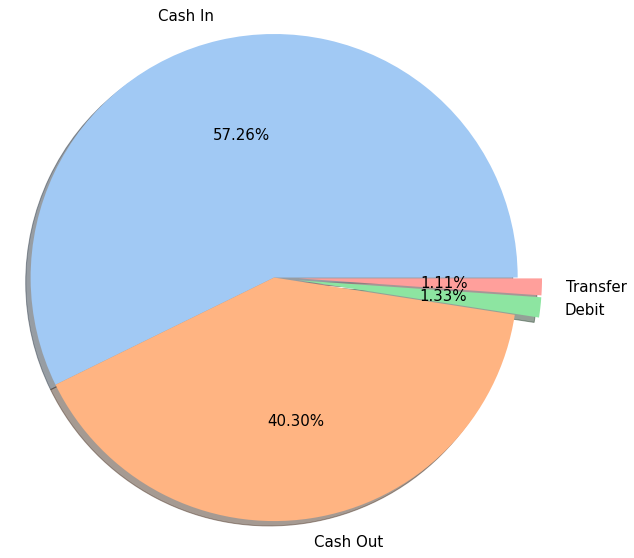

In [16]:
data = [(transaction_type[0]/total) *100, (transaction_type[1]/total) *100, (transaction_type[2]/total) *100, 
        (transaction_type[3]/total) *100]
label = ["Cash In", "Cash Out", "Debit", "Transfer"]

explode = (0, 0, 0.1, 0.1) 
colors = sns.color_palette('pastel')[0:4] 
textprops = {"fontsize":15}

plt.figure(figsize=(10, 10))
plt.pie(data, labels = label,explode = explode, colors = colors, autopct='%.2f%%',shadow = True, textprops =textprops)
plt.axis('equal')
plt.show()

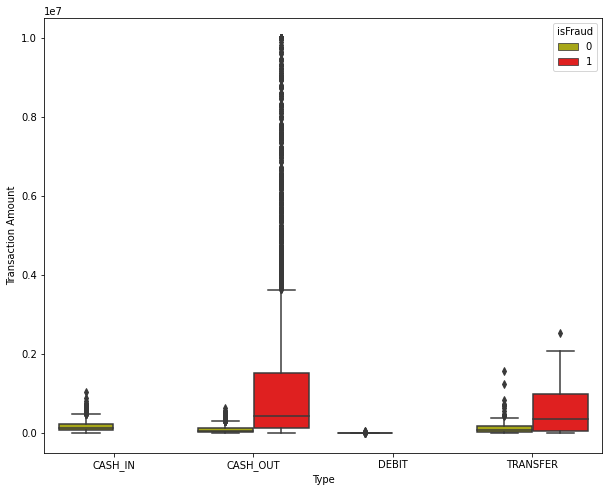

In [17]:
## Boxplot: transaction amount vs. the transaction type
plt.figure(figsize = (10,8))
sns.boxplot(data = Fraud_data_sample, y = "amount", hue = "isFraud", x = "type", palette = ['y', 'r'])
plt.xlabel("Type")
plt.ylabel("Transaction Amount")
plt.show()
# ouliers: extreme transaction amounts-> I wouldn't be removing them b/c clearly there is some fraudulent activity going on
 # especially for cash outs
# transaction amounts for cash outs and transfers that are fraud have high variability

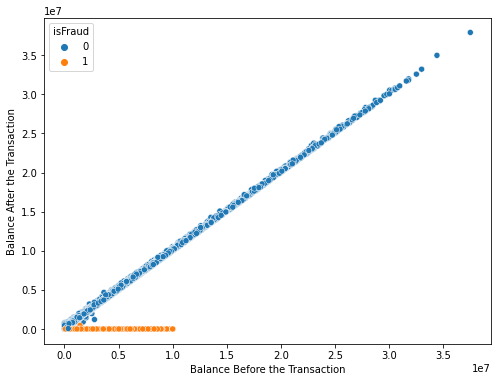

In [18]:
## Scatter plot: balance before the transaction vs. balance after the transaction
plt.figure(figsize = (8,6))
sns.scatterplot(data = Fraud_data_sample, y = "newbalanceOrig", x = "oldbalanceOrg", hue = "isFraud")
plt.xlabel("Balance Before the Transaction")
plt.ylabel("Balance After the Transaction")
plt.show()

# There doesn't seem to be any relationship between balance before and after the fraudulent transactions
# However for non-fraudulent transactions, there is clearly a very strong linear association

In [19]:
## correlation matrix
Corr_matrix = Fraud_data_sample.drop(["step"], axis =1).corr()


<AxesSubplot:>

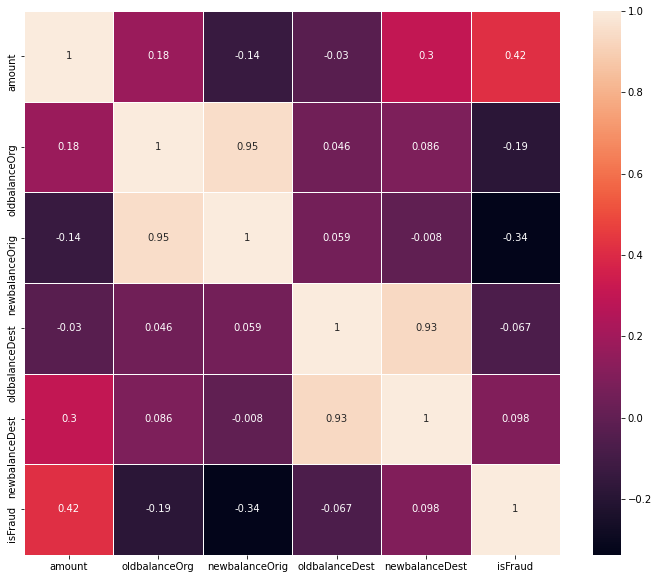

In [20]:
## visualizing correlation matrix 
plt.figure(figsize = (12,10))
sns.heatmap(data= Corr_matrix, vmax = 1, annot = True, linewidths = 0.5)
# We can notice multicollinearity: balance before and after the transaction for both the recepient and 
 # the customer are highly correlated-> I would remove one of variables from each of the correlated pairs 
 # when I fit logistic regression and naive bayes

## Model Fitting

In [21]:
## X and Y Variables
x = Fraud_data_sample[["amount", "oldbalanceOrg", "oldbalanceDest"]]
y = Fraud_data_sample["isFraud"]

In [22]:
## splitting data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


### Logistic Regression

In [23]:
## fitting logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train,y_train)

In [24]:
## Accuracy Score
lr.score(x_test, y_test)
# 79% accuracy

0.7925531914893617

In [25]:
## predictions
pred = lr.predict(x_test)

In [26]:
## confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)

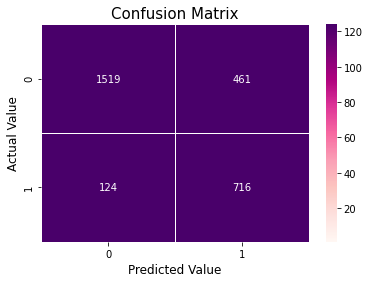

In [27]:
## visualizing the confusion matrix
sns.heatmap(cm, vmax = 1, annot = True, fmt = ".0f",linewidths = 0.5, cmap = 'RdPu')
plt.xlabel("Predicted Value", fontsize = 12)
plt.ylabel("Actual Value", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 15);

### Gaussian Naive Bayes

In [28]:
#fitting the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train, y_train)

In [29]:
## Accuracy
gnb.score(x_test, y_test )
## performed slightly better than logistic regression-> 82.8% accuracy

0.8280141843971631

In [30]:
#predicted values
pred1 = gnb.predict(x_test)

In [31]:
# confusion matrix
cm_gnb = metrics.confusion_matrix(y_test, pred1)

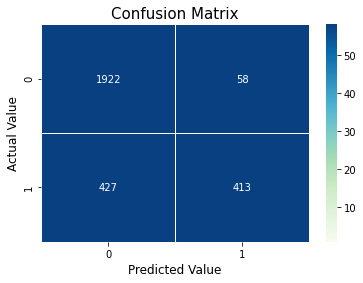

In [32]:
## visualizing the confusion matrix
sns.heatmap(cm_gnb, vmax = 1, annot = True, fmt = ".0f",linewidths = 0.5, cmap = "GnBu")
plt.xlabel("Predicted Value", fontsize = 12)
plt.ylabel("Actual Value", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 15);

## Conclusion

In this project, I analyzed a financial dataset that I got from Kaggle. I cleaned the data and took a sample to perform exploratory data analysis and fit statistical learning models. I implemented logistic regression and naive bayes. Both methods try to classify transactions based on the amount of transaction, balance before the transaction in initiators account, and balance before the transaction in recipient’s account. Although naive bayes performs slightly better with 82.2% accuracy, from the confusion matrices, we find that naive bayes identifies non-fraudulent transactions better, whereas logistic regression is better at identifying fraudulent transactions.

